In [5]:
import pandas as pd


df = pd.read_csv("data/inflation.csv", parse_dates=True, index_col="Month")
df = df[df.index >= "2005-01-01"]
df.head()

,Inflation
Month,
2005-01-01,7.3
2005-02-01,7.3
2005-03-01,7.1
2005-04-01,7.2
2005-05-01,7.3


In [6]:
alpha = df.min().iloc[0] + 1

(df + alpha).head()

,Inflation
Month,
2005-01-01,7.9
2005-02-01,7.9
2005-03-01,7.7
2005-04-01,7.8
2005-05-01,7.9


Split -- Total: 240, Train: 192, Test: 48
  Metric     Value
0    MAE  1.785829
1   MAPE  0.319525
2    MSE  5.663343


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

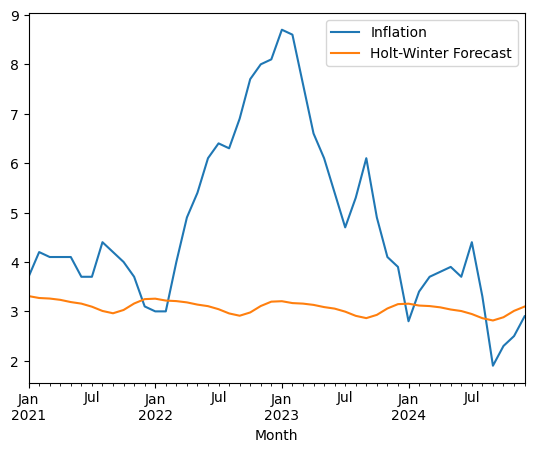

In [7]:
# Holt winter
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from utils import split_fixed, get_metrics, split_ratio


train, test = split_ratio(df)

modelMul = ExponentialSmoothing(
    train + alpha,
    seasonal_periods=12,
    trend="multiplicative",
    seasonal="additive",
    use_boxcox=True,
).fit()

print(get_metrics(
    test, 
    modelMul.forecast(len(test)) - alpha
) )

test.plot( legend=True)
(modelMul.forecast(len(test)) - alpha).plot(label="Holt-Winter Forecast", legend=True)

c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='Month'>

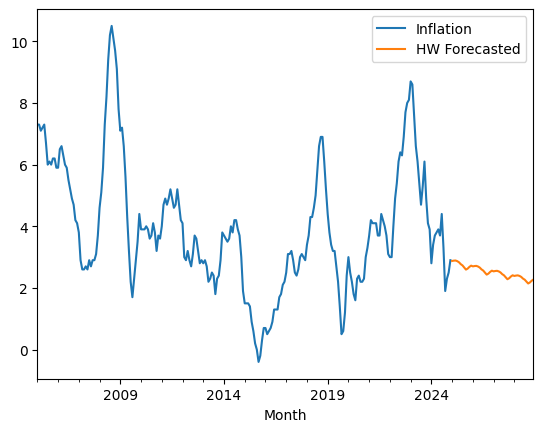

In [8]:
# Apply to whole data

modelMul = ExponentialSmoothing(
    df + alpha,
    seasonal_periods=12,
    trend="multiplicative",
    seasonal="additive",
    use_boxcox=True,
).fit()

df.plot(legend=True, label="Actual Inflation")
(modelMul.forecast(len(test)) - alpha).plot(label="HW Forecasted", legend=True)